# PARKINSON'S DISEASE PREDICTION FROM VOICE RECORDINGS
### Three different studies produced three different voice recording acoustic analysis metadata. The datasets from the three studies are analysed independently because the metrics collected on different systems are similar but not the same in that the signals are processed differently to get the independent variables analyzed.  
### Acoustic metrics of the healthy patients and Parkinson's patients at different stages are used to compare and contrast to generate a disease/healthy prediction. 
## Problem Statement
### Determine which Patients will have a Parkinson's disease diagnosis using metrics measured from 16 biomedical voice speech analytical signals. The outcome is Parkinson diagnosed score = 0, Healthy Patient score = 1 and or an physician evaluated UPDRS (Unified Parkinson's disease rating scale) parkinson spectrum ranking based on data collected over a 6 month period.
## Hypothesis
### Parkinson's Disease can be determined from considering acoustic patterns of voice recordings. 

## Background
### The 3 datasets are composed of a range of biomedical voice measurements from healthy people to people with early-late stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring.
### The biomedical voice recordings and analysis were  performed on 2 different systems, Multi-Dimensional Voice Program (MDVP) and Praat. The hardware specifications and software algorithms are different for each system making it not feasable to combine datasets from each study.  The analysis metric names are the same for each dataset but not equivalent.  The details and assumptions of the recording analysis is summarized in each dataset section.
### Voice recordings including repetative sustained vowels sounds, numbers, words and short sentences. 
![](images/raw_voice.png)
### This raw data recording shows a temporal sample of 3 repetitions of a sustained vowel sound by a healthy individual (top) and the some vowel sound by a Parkinson's patient (bottom). The samples show clear differences in jitter and shimmer. 
### Both Jitter and shimmer measurements are key in quantifying horseness which is a key charateristic of Parkinson's patients.
![](images/shimmer_jitter.png)
#### Jitter is a measure defined as the average absolute difference between an interval and the average of it and its four closest neighbours, divided by the average interval.
#### Shimmer is the average absolute difference between the amplitudes of consecutive periods, divided by the average amplitude.
### Both jitter and shimmer voice reports gives six kinds of measurements depending on the interval being considered (appendix D). From the raw data, jitter and shimmer  are key to distinguishing Parkinson's patient voice patterns compared to healthy voce patients.
## Assumptions
### - Male and female voice metric differences are normalized with both recording-analysis systems.
### - Observed voice recording variations are attributed to Parkinson's disease though similar syptoms are associated with dimensia and altzheimers disease. 
### - The UPDRS score system to classify the onset stage of Parkinson's disease is somewhat subjective depending on the evaluting physician. 
## The Dataset
### The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. Each column in the table is a particular voice measure. There are multiple recordings per patient, the patient is identified in the first column.
### Time and frequency based features are extracted from each voice sample.
- 1  Subject id 
- 2  Jitter (local)
- 3  Jitter (local, absolute)
- 4  Jitter (rap)
- 5  Jitter (ppq5)
- 6  Jitter (ddp)
- 7  Shimmer (local)
- 8  Shimmer (local dB)
- 9  Shimmer (apq3)
- 10 Shimmer (apq5) 
- 11 Shimmer (apq11)
- 12 Shimmer (dda) 
- 13 AC (Autocorrelation)
- 14 NTH (noise to harmonic ratio)
- 15 HTN (Harmonic to noise)
- 16 Median pitch,Mean pitch
- 17 Standard deviation
- 18 Minimum pitch,Maximum pitch 
- 19 Number of pulses
- 20 Number of periods
- 21 Mean period
- 22 Standard deviation of period 
- 23 Fraction of locally unvoiced frames
- 24 Number of voice breaks
- 25 Degree of voice breaks 
- 26 class 



In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
sns.set_style("darkgrid")
import statsmodels.api as sm
from sklearn import linear_model

/Users/ebola/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# DATASET 1 - 2009
### The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures. Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring.
|     |      
--- | ---
Date Donated:  |2009-10-29
Data Set Characteristics:  |Multivariate
Associated Tasks:  |Regression
Area:  |Life
Attribute Characteristics:  |Integer, Real
Number of Instances:  |5875
Number of Attributes:  |26

In [2]:
#Import DATASET 1
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data'
df1 = pd.read_csv(path, sep=',')
df1.head()

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5   ...     Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317   ...           0.230       0.01438   
1     0.000017     0.00132      0.00150   ...           0.179       0.00994   
2     0.000025     0.00205      0.00208   ...           0.181       0.00734   
3     0.000027     0.00191      0.00264   ...           0.327       0.01106   
4     0.000020     0.00093      0.00130   ...           0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      0.04314  0.014290  21.640  0.41888   
1       0.01072        0.01689      0.02982  0.011112  27.183  0.43493   
2       0.00844        0.01458      0.02202  0.020220  23.047  0.46222   
3       0.01265        0.01963      0.03317  0.027837  24.445  0.48730   
4       0.00929        0.01819      0.02036  0.011625  26.126  0.47188   

       DFA      PPE  
0  0.54842  0.16006  
1  0.56477  0.10810  
2  0.54405  0.21014  
3  0.57794  0.33277  
4  0.56122  0.19361  

[5 rows x 22 columns]

## Correlation Matrix
### The cross correlation matrix indicates that there is a strong correlation among the Jitter analysis parameters and among the shimmer analysis parameters and  a weaker correlation between jitter and shimmer. 

Correlation matrix
Axes(0.125,0.125;0.62x0.755)


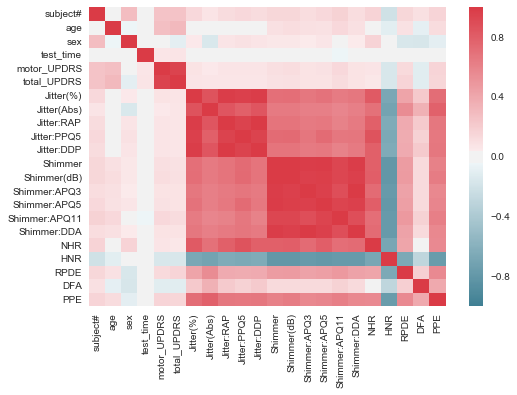

In [3]:
#DATASE1 Variable Crosscorrelation
column_list1 = df1.columns.values.tolist()
cmap = sns.diverging_palette(220,10, as_cmap=True)
correlations1 = df1[column_list1].corr()
print ("Correlation matrix")
print sns.heatmap(correlations1, cmap=cmap)

### The outcome for this dataset is the UPDRS value which is in the range of 0 to 50. The "UPDRS_motor" is only considering the affected muscular components as opposed to the neurological components of the rating system which should have a greater effect on measured speach metrics. 

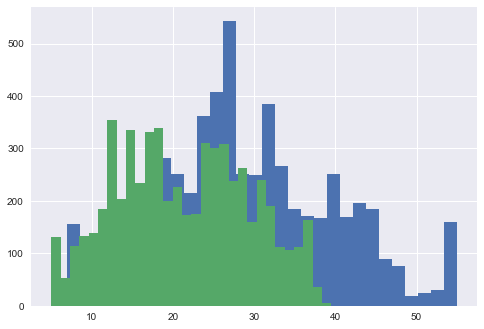

In [4]:
# histagram of UPDRS
df1['total_UPDRS'].hist(bins=30),
df1['motor_UPDRS'].hist(bins=30)

### Boxplot of the input variables indicates that there are many outliers  

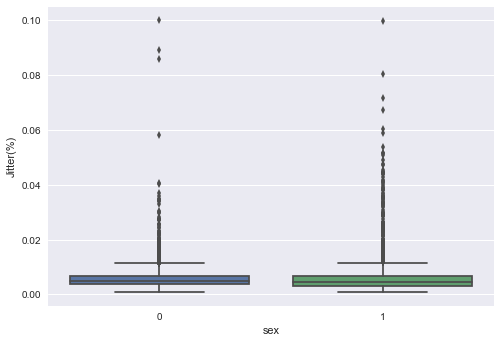

In [5]:
sns.boxplot(x="sex", y="Jitter(%)", data=df1)

### A Historam - Scatter plot confirms the dispersion of the data and the residuals do not exhibit a normal distribution

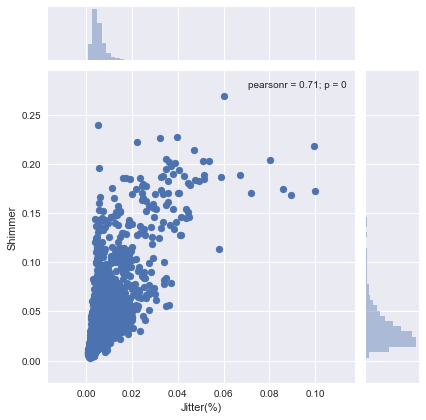

In [6]:
sns.jointplot(x="Jitter(%)", y="Shimmer", data=df1);

### Rescaling with Log of the data makes the residuals more normally distributed

In [8]:
log_columns = ["Jitter(%)",'Jitter(Abs)',  'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
df1_log = df1.copy()
df1_log[log_columns] = df1_log[log_columns].apply(np.log10)

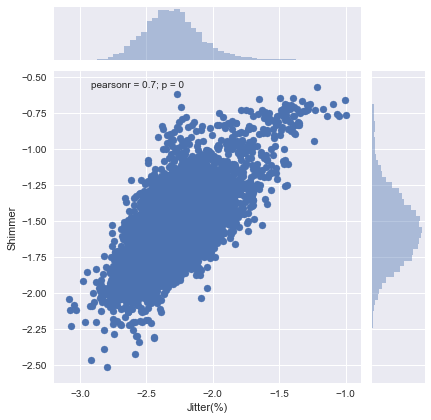

In [9]:
sns.jointplot(x="Jitter(%)", y="Shimmer", data=df1_log);

### The UPDRS scale can be quantized by binning the range

In [10]:
def my_classifier(row):
    if row['total_UPDRS'] > 50:
        return 0
    elif row['total_UPDRS'] > 40: 
        return 1
    elif row['total_UPDRS'] > 30:
        return 2
    elif row['total_UPDRS'] > 20:
        return 3
    elif row['total_UPDRS'] > 10:
        return 4
    else:
        return 5
    
quantum = df1.apply(my_classifier, axis=1)

df1['updrs']= quantum

### A graphical review indicates that the variables show no differentiation for the outcome

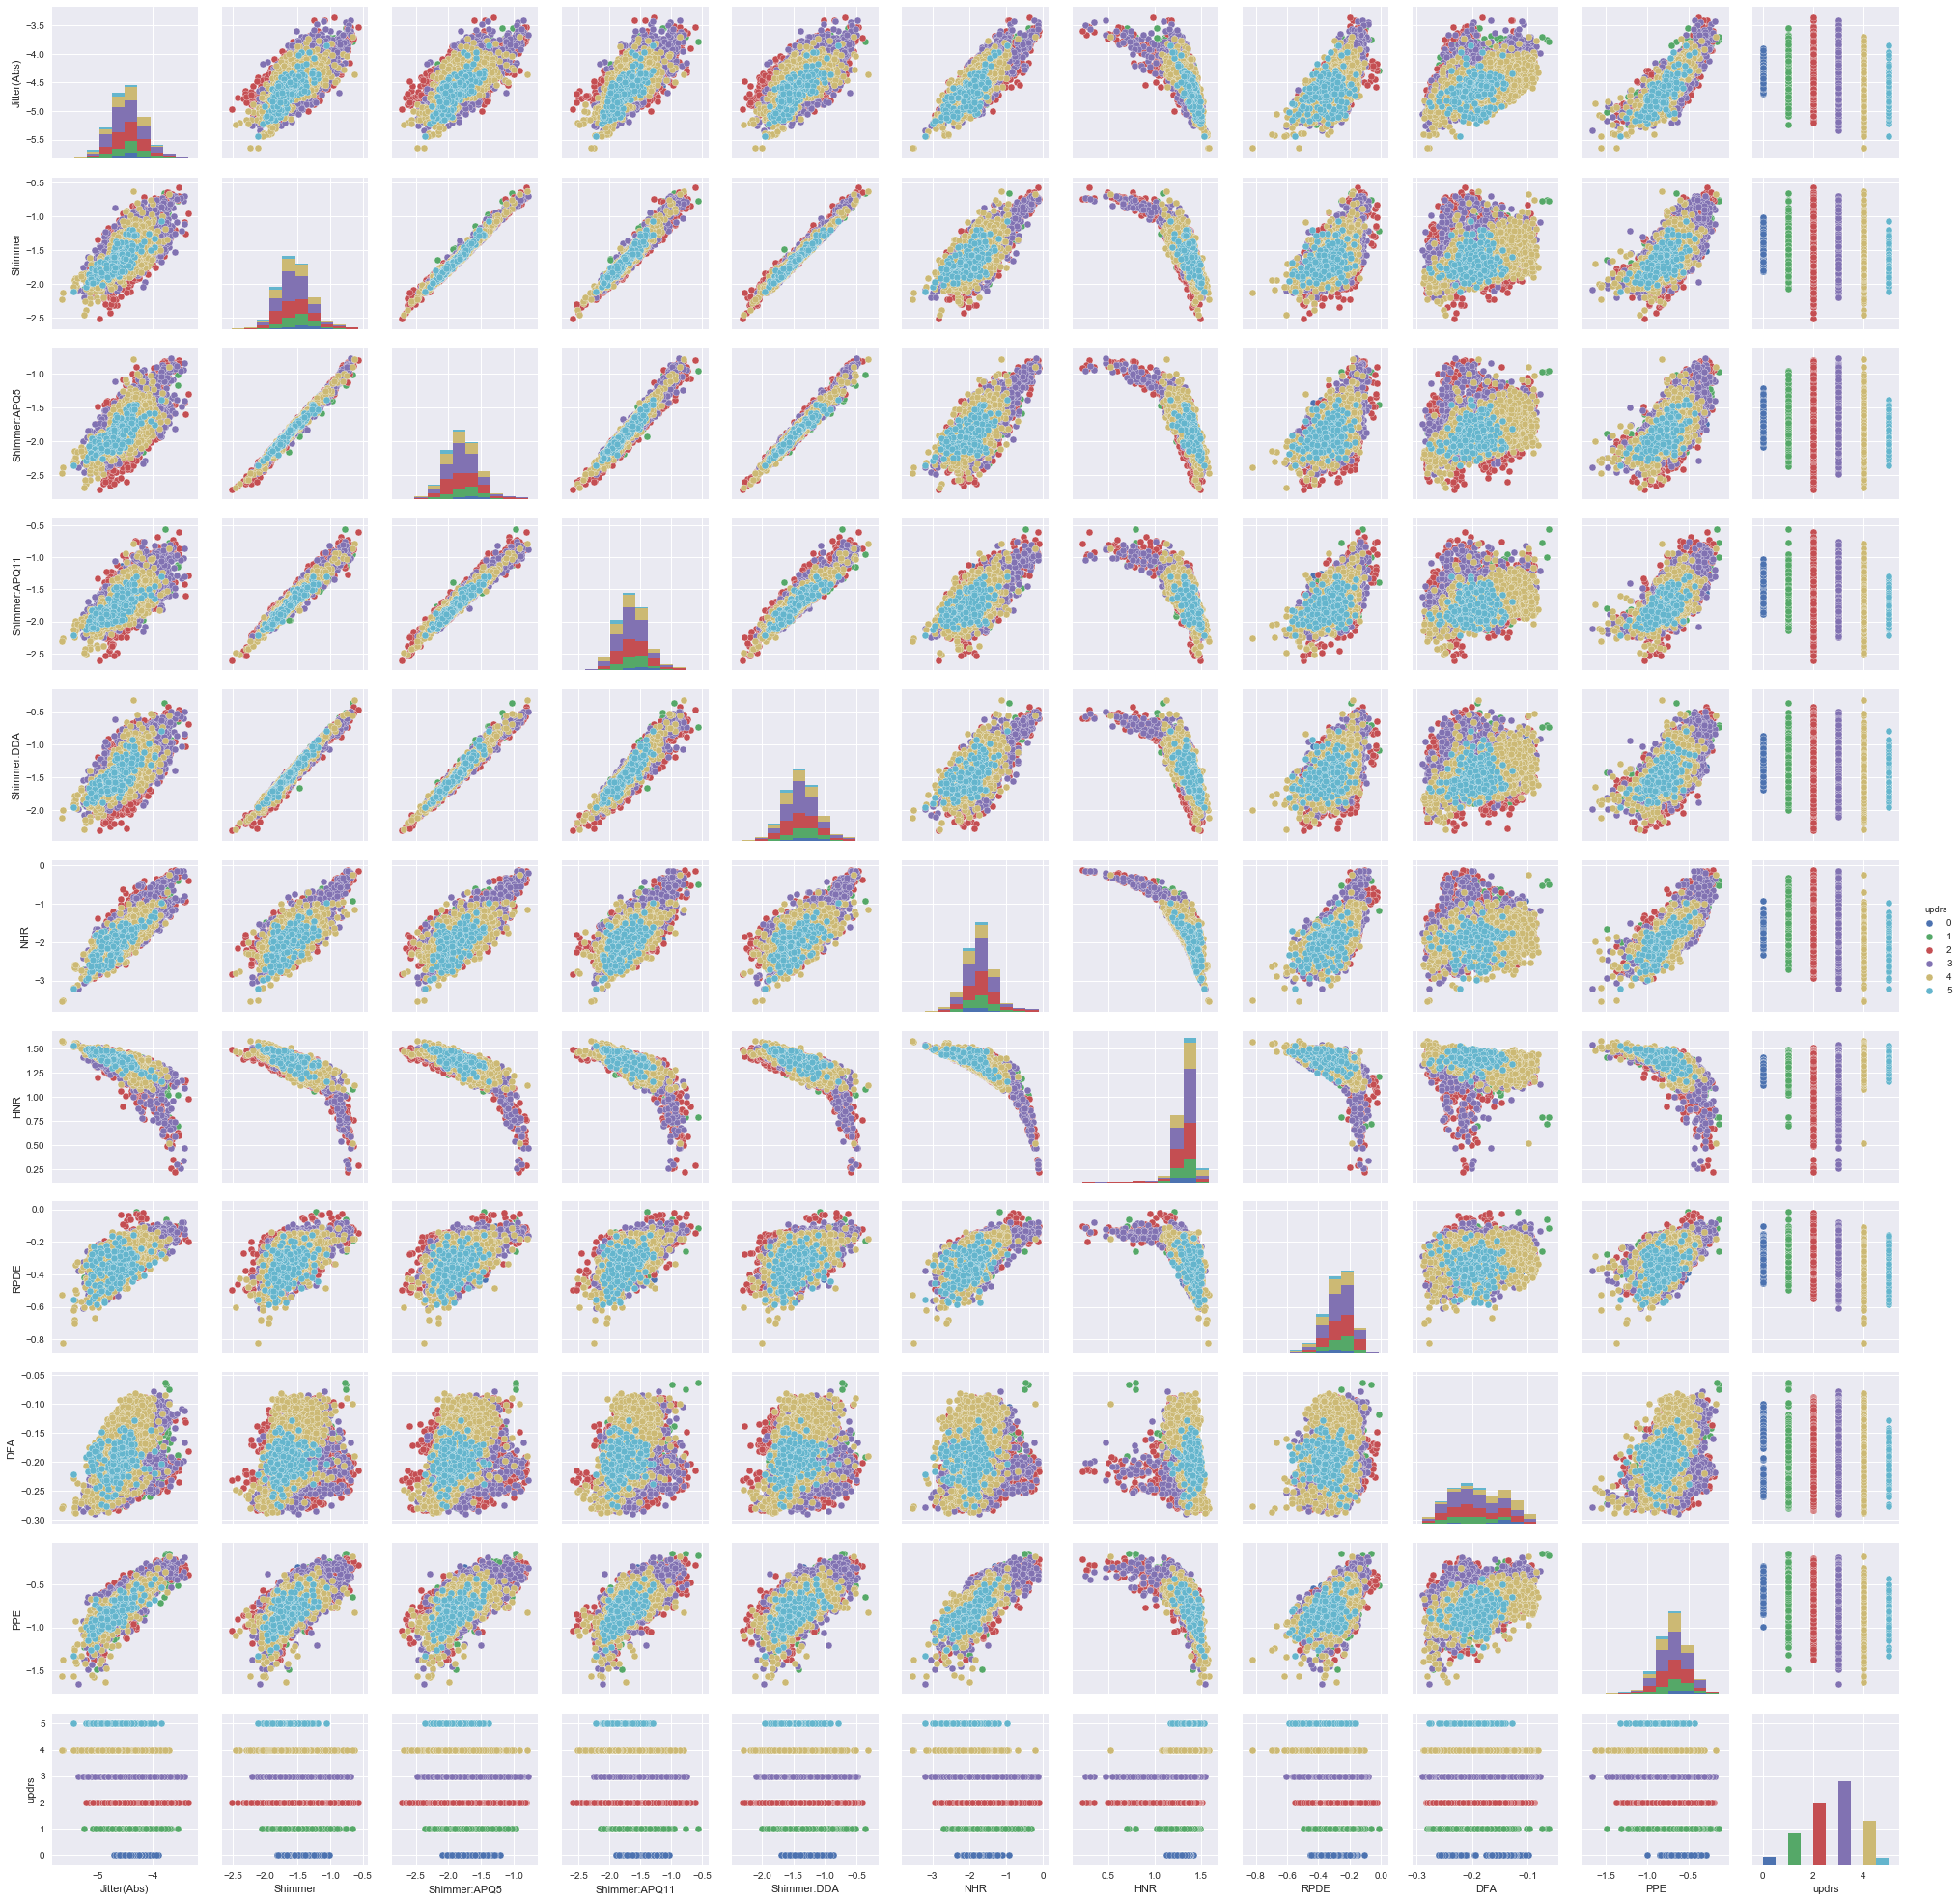

In [11]:
%matplotlib inline
df1_log['updrs']= quantum
sns.pairplot(df1_log[['Jitter(Abs)',  'Shimmer', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE','updrs']], hue= 'updrs')

### Closer examination indicates that all outcomes are layered on top of eachother

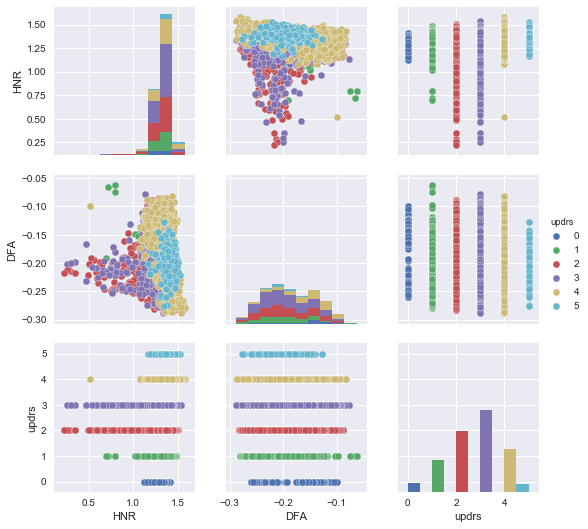

In [12]:
sns.pairplot(df1_log[[  'HNR',  'DFA', 'updrs']], hue= 'updrs')

### Because The UPDRS outcome is not catagorical, a linear regression can be applied

/Users/ebola/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in divide
  corr /= row_norms(X.T)
/Users/ebola/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/ebola/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/ebola/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/ebola/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling 

P Values: [             nan   2.23896071e-37   1.19648479e-36   3.60642448e-11
   3.03604841e-11   3.57962469e-11   5.37911943e-30   5.75268821e-32
   6.90391231e-22   6.87573859e-26   1.16147613e-43   6.86747093e-22
   5.67979747e-49   2.69999529e-32   4.48077602e-65   1.88373611e-18
   4.93010149e-49]
Coefficients: [  0.00000000e+00   2.24794180e-01   3.03798641e-03  -1.24391907e+03
  -6.37209994e+00   4.14179096e+02  -1.50407859e-01  -9.09178455e-02
  -2.41110641e+01  -3.65571212e-01   4.88534458e-01   2.42647758e+01
  -6.29188926e-02  -1.41258833e-01   2.55063095e-01  -1.16440928e+00
   9.72224747e-02]
y-intercept: -9.45098161174
R-Squared: 0.128498168289


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

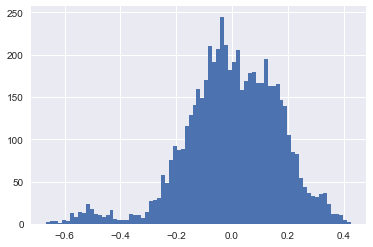

In [13]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=int(np.ceil(np.sqrt(len(y)))))
    # keep the model
    return algo

y1_log = df1_log['total_UPDRS'].apply(np.log10)

x1_log = df1_log[['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']]
x1_log = sm.add_constant(x1_log)
get_linear_model_metrics(x1_log, y1_log, linear_model.LinearRegression())

### The p values are good because they are approaching zero and the coefficients look reasonable but the R-squared values is very low at 0.13
### Because of the poor quality of the data, a ridge linear regression provives similar poor results. Lasso and ElasticNet regression analysis fail completely.

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
P Values: [             nan   2.23896071e-37   1.19648479e-36   3.60642448e-11
   3.03604841e-11   3.57962469e-11   5.37911943e-30   5.75268821e-32
   6.90391231e-22   6.87573859e-26   1.16147613e-43   6.86747093e-22
   5.67979747e-49   2.69999529e-32   4.48077602e-65   1.88373611e-18
   4.93010149e-49]
Coefficients: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.  0.]
y-intercept: 1.42870448908
R-Squared: 0.0

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
P Values: [             nan   2.23896071e-37   1.19648479e-36   3.60642448e-11
   3.03604841e-11   3.57962469e-11   5.37911943e-30   5.75268821e-32
   6.90391231e-22   6.87573859e-26   1.16147613e-43   6.86747093e-22
   5.67979747e-49   2.69999529

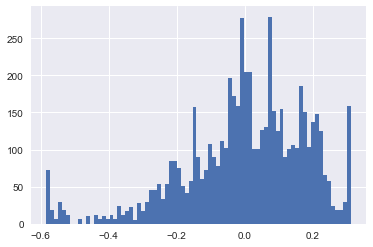

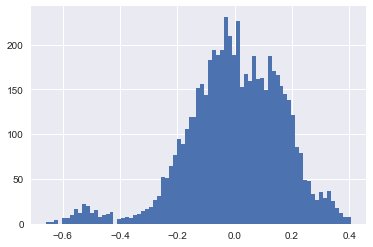

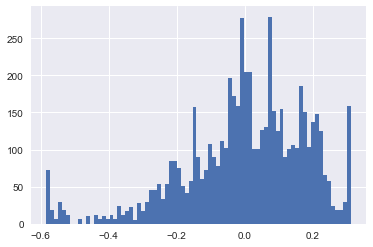

In [14]:
estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print est
    get_linear_model_metrics(x1_log, y1_log, est)
    print

# DATASET 2 - 2014
### Dataset 2 consists of a training and a teat datasets. 
### The training data set has 520 samples from healthy people and 520 samples from various stages of parkinson's patients. The training data belongs to 20 people with parkinson's (6 female, 14 male) and 20 healthy individuals (10 female, 10 male)  
### The test dataset consists of only samples from parkinson's patiens only. 
### A "status" outcome is give for healthy vs parkinson's patient. A UPDRS (Unified Parkinson's Disease Rating Scale) score of each patient which is determined by expert physician is also available in this dataset, therefore, this dataset can also be used for regression.
| | 
--- | ---
Date Donated: | 2014-06-12
Data Set Characteristics: | Multivariate
Associated Tasks: | Classification, Regression
Area: | Life
Attribute Characteristics: | Integer, Real
Number of Instances: | 1040
Number of Attributes: | 26 
Missing Values? | N/A

From all subjects, 26 voice samples including sustained vowels, numbers, words and short sentences are taken. 





## Import Training Data

In [16]:
#UCI Train Dataset with 1040 Instances
#https://archive.ics.uci.edu/ml/datasets/Parkinson+Speech+Dataset+with++Multiple+Types+of+Sound+Recordings#
df2_train = pd.read_csv('Parkinson_Multiple_Sound_Recording_Data/train_data.txt', sep=',')
df2_train_log = df2_train.apply(np.log10)
df2_train_count = df2_train.groupby('class').size().reset_index(name='Count').rename(columns={'class':'Parkinson'})
df2_train.head()

id   Jitter(local)  Jitter(local absolute)  Jitter(rap)  Jitter(ppq5)  \
0   1           1.488                0.000090        0.900         0.794   
1   1           0.728                0.000038        0.353         0.376   
2   1           1.220                0.000074        0.732         0.670   
3   1           2.502                0.000123        1.156         1.634   
4   1           3.509                0.000167        1.715         1.539   

   Jitter(ddp)   Shimmer (local)  Shimmer(local dB)  Shimmer(apq3)  \
0        2.699             8.334              0.779          4.517   
1        1.059             5.864              0.642          2.058   
2        2.196             8.719              0.875          4.347   
3        3.469            13.513              1.273          5.263   
4        5.145             9.112              1.040          3.102   

   Shimmer(apq5)  ...    Maximum pitch   Number of pulses  Number of periods  \
0          4.609  ...          187.576                160                159   
1          3.180  ...          234.505                170                169   
2          5.166  ...          211.442               1431               1427   
3          8.771  ...          220.230                 94                 92   
4          4.927  ...          225.162                117                114   

   Mean period  Standard deviation of period  \
0     0.006065                      0.000416   
1     0.005181                      0.000403   
2     0.006071                      0.000474   
3     0.004910                      0.000320   
4     0.004757                      0.000380   

    features 24-26: Fraction of locally unvoiced frames  \
0                                              0.000      
1                                              2.247      
2                                             10.656      
3                                              0.000      
4                                             18.182      

   Number of voice breaks  Degree of voice breaks   UPDRS   class  
0                       0                    0.000      23      1  
1                       0                    0.000      23      1  
2                       1                    0.178      23      1  
3                       0                    0.000      23      1  
4                       1                   13.318      23      1  

[5 rows x 29 columns]

In [17]:
print (df2_train_count)

   Parkinson  Count
0          0    520
1          1    520


### There are 520 healthy patient metadata samples. There are 520 parkinson's patient metadat samples. 520 Parkinson's Patients have a UPDRS value associated with the degree of disease

### Both Jitter and Shimmer variables selfcorrelate and jitter moderately correlates with shimmer

Correlation matrix
Axes(0.125,0.125;0.62x0.755)


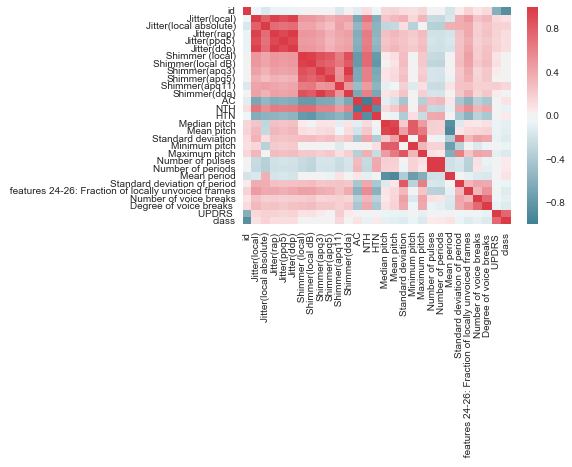

In [18]:
column_list2_train = df2_train.columns.values.tolist()
cmap = sns.diverging_palette(220,10, as_cmap=True)
correlations2_train = df2_train[column_list2_train].corr()
print ("Correlation matrix")
print sns.heatmap(correlations2_train, cmap=cmap)

### The Outcome has half of the sample population catagorized as healthy (UPDRS = 0) and the Parkinson's poulation having a UPDRS value dependent on the degree ofthe disease'

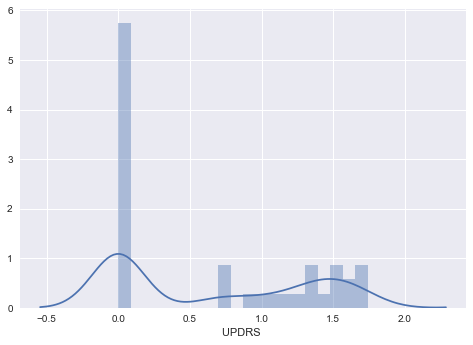

In [51]:
sns.distplot(df2_train_log['UPDRS ']);

In [24]:
train_df = df2_train[['Jitter(local absolute)','NTH','class']]
cmap = {'0': 'b', '1': 'g', '2': 'r' }
train_df['c_class'] = train_df['class'].apply(lambda x: cmap[str(x)])
#train_df.plot('Jitter(local absolute)','NTH', kind='scatter',facecolors='none', c=train_df.c_class,edgecolors='face')
#plt.xlim(0, .001)
#plt.show()

/Users/ebola/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


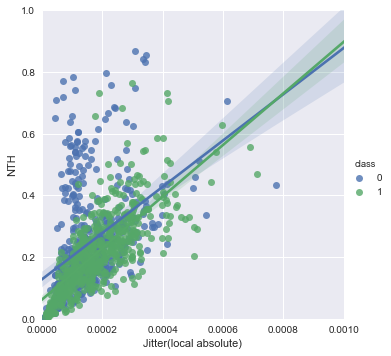

In [21]:
sns.lmplot(y='NTH', x='Jitter(local absolute)', data=train_df,  hue="class")
plt.ylim(0, 1)
plt.xlim(0, .001)
sns.plt.show()

### The Training data residuals in Dataset2 also should be normalized using log of the data

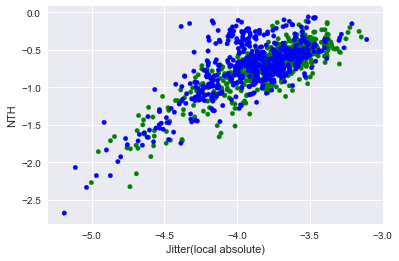

In [27]:
train_df_log = df2_train[['Jitter(local absolute)',' AC' ,'NTH' ,'HTN', ' Median pitch' ,'Mean pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch','UPDRS ']].apply(np.log10)
train_df_log['class'] = df2_train['class']
cmap = {'0': 'b', '1': 'g', '2': 'r' }
train_df_log['c_class'] = train_df_log['class'].apply(lambda x: cmap[str(x)])
train_df_log.plot('Jitter(local absolute)' ,'NTH', kind='scatter',facecolors='none', c=train_df.c_class,edgecolors='face')
plt.show()

### Graphical review indicates that there is also a uniform variable overlay making for a difficult task in discriminating parkinson's patients from the healthy

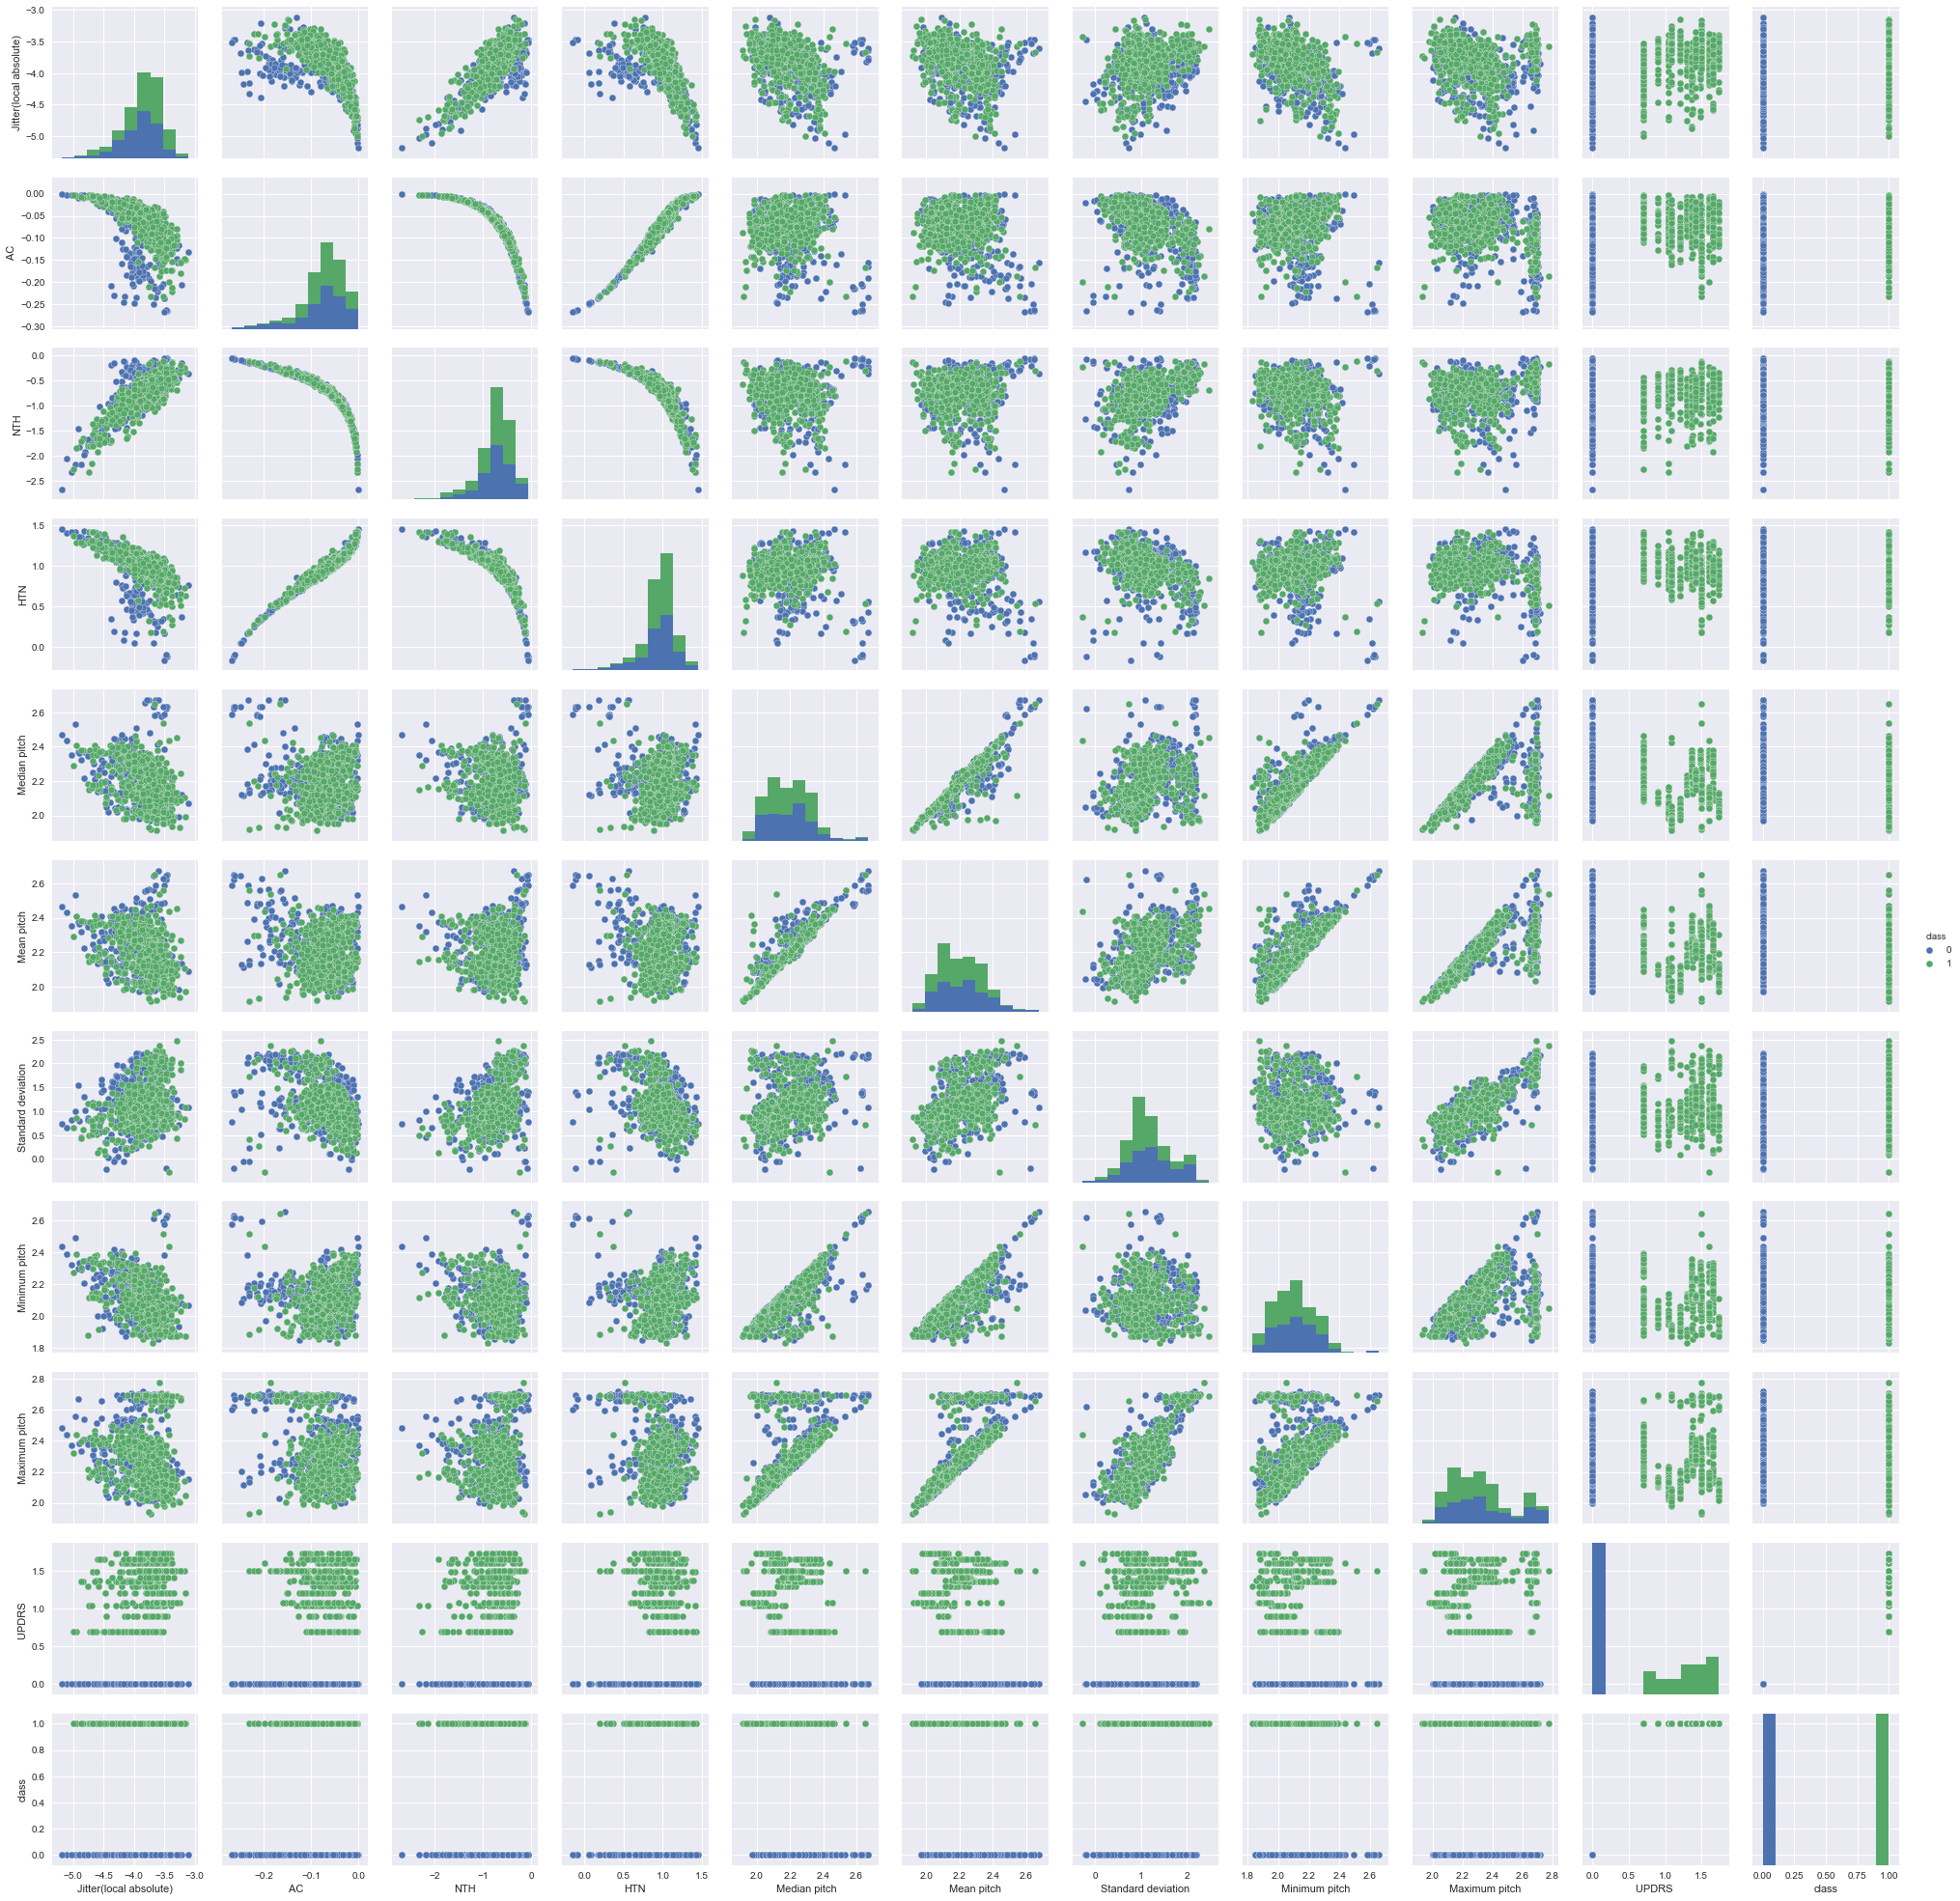

In [28]:
sns.pairplot(train_df_log, hue= 'class')
sns.plt.show()


### Linear model regression using UPDRS values as the outcome produces a terrible model with rather large p values and a very low R-squared value of 0.016

P Values: [ 0.0864873   0.03638723  0.0645078   0.00021001  0.16915378  0.00039905]
Coefficients: [-2.59622153  0.00706876  0.60818093 -0.16341621 -0.1858668  -0.01118743]
y-intercept: 0.466084607096
R-Squared: 0.0163433186875


/Users/ebola/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

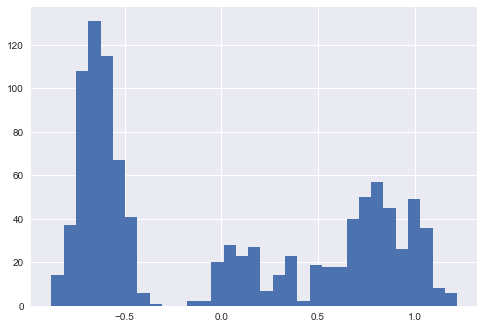

In [46]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=int(np.ceil(np.sqrt(len(y)))))
    # keep the model
    return algo

y = train_df_log['UPDRS ']
x = train_df_log[[' AC',' Median pitch','HTN','Standard deviation','Minimum pitch', 'Maximum pitch']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())

### The ridge model does not produce much better results with an R-squared of 0.022 a

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  3.31321842e-03   2.15669998e-02   1.64636650e-03   2.28615061e-05]
Coefficients: [ 0. -0.  0. -0.]
y-intercept: 0.5
R-Squared: 0.0

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
P Values: [  3.31321842e-03   2.15669998e-02   1.64636650e-03   2.28615061e-05]
Coefficients: [-0.16391205 -0.13345385  0.17494254 -0.10625838]
y-intercept: 0.737602464984
R-Squared: 0.0220183425012

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  3.31321842e-03   2.15669998e-02   1.64636650e-03   2.28615061e-05]
Coefficients: [ 0. -0.  0. -0.]
y-inte

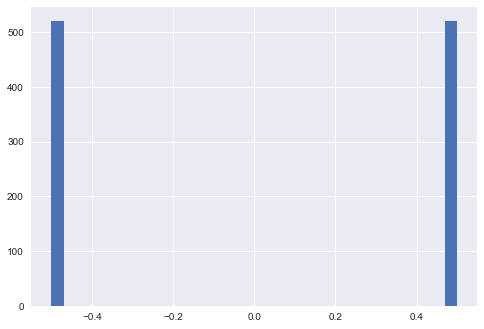

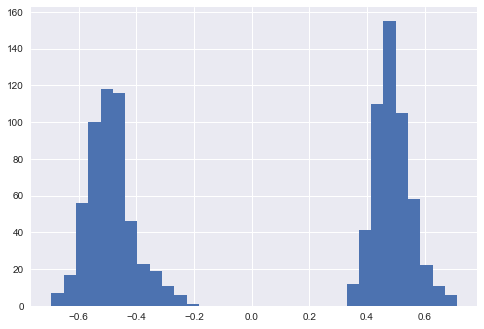

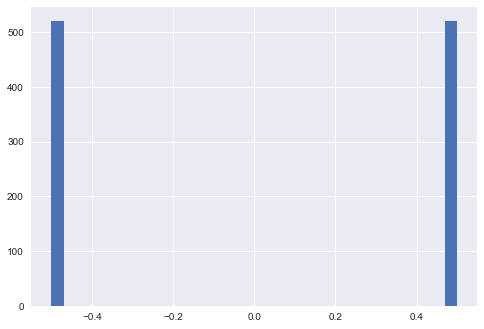

In [23]:

estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print est
    get_linear_model_metrics(x, y, est)
    print

# DATASET 3 - 2008
### This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.
| | 
--- | --- 
Date Donated: | 2008-06-26
Data Set Characteristics: | Multivariate
Associated Tasks: | Classification
Area: | Life
Attribute Characteristics: | Real
Number of Instances: | 197
Number of Attributes: | 23
Missing Values: | N/A


### Data Set Information:
### The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.


### Import Dataset 3

In [29]:
#UCI dataset with 193 instances 2008
#https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data
df3 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data', sep=',')
df3.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer    ...     \
0           0.00007   0.00370   0.00554     0.01109       0.04374    ...      
1           0.00008   0.00465   0.00696     0.01394       0.06134    ...      
2           0.00009   0.00544   0.00781     0.01633       0.05233    ...      
3           0.00009   0.00502   0.00698     0.01505       0.05492    ...      
4           0.00011   0.00655   0.00908     0.01966       0.06425    ...      

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

### In this dataset there are 48 healthy patients and 147 parkinson's patients

In [133]:
df3_count = df3.groupby('status').size().reset_index(name='Count').rename(columns={'status':'Col_value'})
print (df3_count)

   Col_value  Count
0          0     48
1          1    147


### Correlation matrix indicates a similar trend in the measured variables in that jitter and shimmere are closely selfcorrelated and marginally correlted to eachother.

Correlation matrix
Axes(0.125,0.125;0.62x0.755)


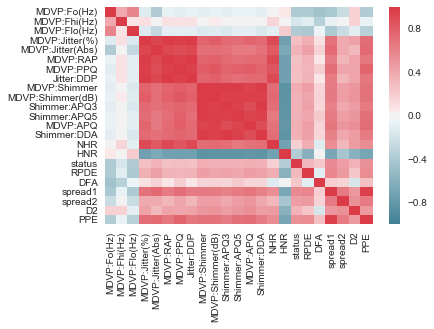

In [30]:
column_list3 = df3.columns.values.tolist()
cmap = sns.diverging_palette(220,10, as_cmap=True)
correlations3 = df3[column_list3].corr()
# correlations3 = df3[['test_time','motor_UPDRS','total_UPDRS','Jitter(%)','Jitter(Abs)','Jitter:RAP','Jitter:PPQ5','Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11','Shimmer:DDA','NHR','HNR','RPDE','DFA','PPE']].corr()
print ("Correlation matrix")
print sns.heatmap(correlations3, cmap=cmap)

### Graphical inspection of the variables indicates a similar lack of differentiation in the variables according to outcome.

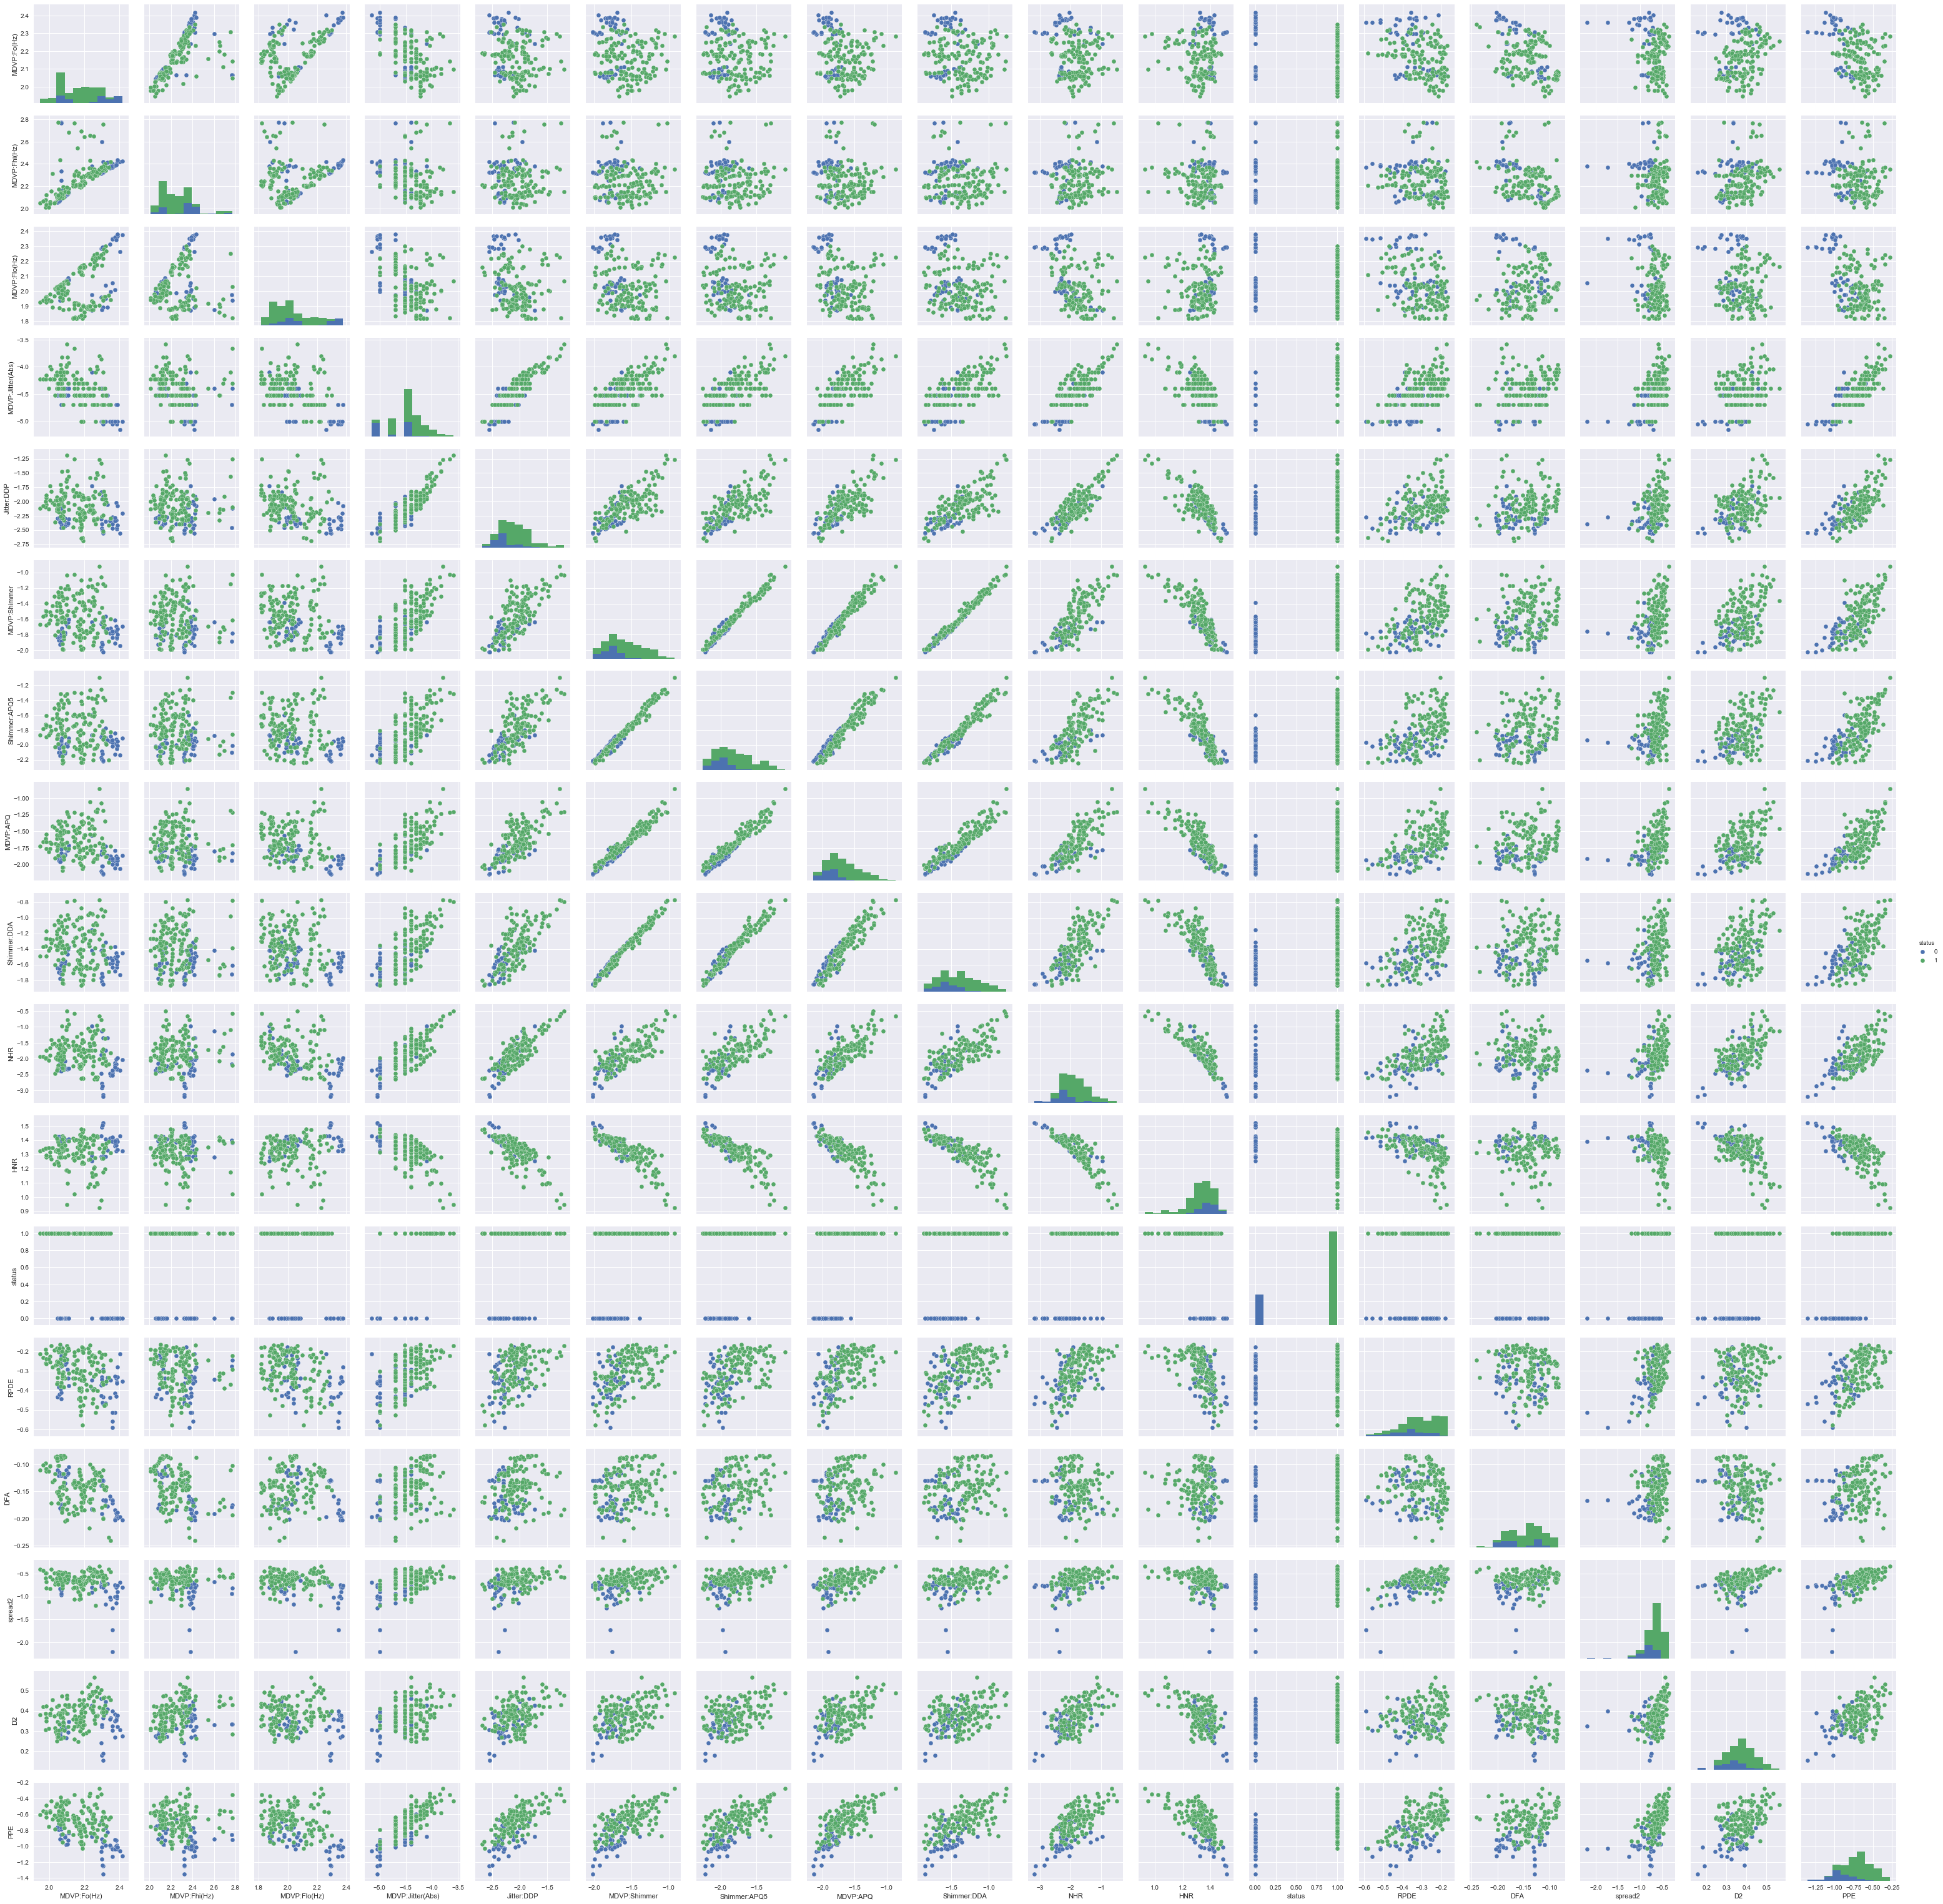

In [31]:
df3_train=df3[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'Jitter:DDP', 'MDVP:Shimmer', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',  'spread2', 'D2', 'PPE']]
df3_train_log = df3_train.apply(np.log10)
df3_train_log['status'] = df3_train['status']
df3_train_log.head()
sns.pairplot(df3_train_log, hue= 'status')
sns.plt.show()

### The outcome is a classification 0 = healthy and 1 = parkinson's on this dataset so a classification logistical regression model is attempted on log transformed data to obtain normally distributed residuals.

In [32]:
X3_log = df3[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread2', 'D2', 'PPE']].apply(np.log10)
X3_log = sm.add_constant(X3_log)

Y3_log = df3['status']

lm_log = sm.Logit(Y3_log, X3_log)
result_log = lm_log.fit()
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.198565
         Iterations 32


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:                  195
Model:                          Logit   Df Residuals:                      173
Method:                           MLE   Df Model:                           21
Date:                Tue, 22 Aug 2017   Pseudo R-squ.:                  0.6442
Time:                        16:36:46   Log-Likelihood:                -38.720
converged:                       True   LL-Null:                       -108.82
                                        LLR p-value:                 1.250e-19
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -411.5898   1314.417     -0.313      0.754   -2987.800    2164.620
MDVP:Fo(Hz)          7.7931      9.676      0.805      0.421     -11.171      26.757
MDVP:Fhi(Hz)        -2.1211      3.528     -0.601      0.548      -9.035       4.793
MDVP:Flo(Hz)         3.0501      3.361      0.907      0.364      -3.538       9.638
MDVP:Jitter(%)     -30.5920     13.572     -2.254      0.024     -57.193      -3.991
MDVP:Jitter(Abs)    -4.5700      6.927     -0.660      0.509     -18.146       9.006
MDVP:RAP          -358.7955    594.912     -0.603      0.546   -1524.801     807.210
MDVP:PPQ           -13.3831     11.769     -1.137      0.255     -36.449       9.683
Jitter:DDP         386.8677    596.393      0.649      0.517    -782.041    1555.777
MDVP:Shimmer        37.1678     50.647      0.734      0.463     -62.099     136.434
MDVP:Shimmer(dB)    14.5965     19.178      0.761      0.447     -22.991      52.184
Shimmer:APQ3      -374.4366   2501.660     -0.150      0.881   -5277.600    4528.727
Shimmer:APQ5       -42.9730     20.097     -2.138      0.032     -82.363      -3.583
MDVP:APQ            18.2335     14.922      1.222      0.222     -11.013      47.480
Shimmer:DDA        352.1826   2502.772      0.141      0.888   -4553.160    5257.525
NHR                  7.6798      3.508      2.189      0.029       0.804      14.556
HNR                  9.7181     16.258      0.598      0.550     -22.148      41.584
RPDE                -1.7282      5.100     -0.339      0.735     -11.724       8.268
DFA                 65.2245     22.508      2.898      0.004      21.109     109.340
spread2              3.6118      2.626      1.375      0.169      -1.536       8.759
D2                   2.1063      8.384      0.251      0.802     -14.326      18.539
PPE                 23.0425      6.333      3.639      0.000      10.630      35.455
====================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### The Odds associated with each of the parameters is determined from the coefficients

In [33]:
print np.exp(result_log.params)

const               1.773449e-179
MDVP:Fo(Hz)          2.423855e+03
MDVP:Fhi(Hz)         1.199044e-01
MDVP:Flo(Hz)         2.111667e+01
MDVP:Jitter(%)       5.176627e-14
MDVP:Jitter(Abs)     1.035748e-02
MDVP:RAP            1.503439e-156
MDVP:PPQ             1.541008e-06
Jitter:DDP          1.033987e+168
MDVP:Shimmer         1.386023e+16
MDVP:Shimmer(dB)     2.183676e+06
Shimmer:APQ3        2.422511e-163
Shimmer:APQ5         2.173026e-19
MDVP:APQ             8.293105e+07
Shimmer:DDA         8.931886e+152
NHR                  2.164261e+03
HNR                  1.661531e+04
RPDE                 1.776122e-01
DFA                  2.121455e+28
spread2              3.703213e+01
D2                   8.217822e+00
PPE                  1.016738e+10
dtype: float64


### The accuracy of the model with all features is ~89%.

In [34]:
predicted = result_log.predict(X3_log)
threshold = 0.5
predicted_classes = (predicted > threshold).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(Y3_log, predicted_classes)

0.89230769230769236

## Conclusion Discussion
### The Raw voice data used to create the set of metrics contained in the three datasets clearly distinguishes and healthy persons voice pattern from a parkinson's patient voice pattern. the analysis variables generated by the voice capture systems seem to have standardized the voice patterns of both parkinson's and heathy patients. 
### Dataset 1 contains only parkinson patient samples and attemps to distinguis the degree of infliction according to a somewhat subjective physisian evaluation captured by the UPDRS value. There is no training data and the UPDRS scale is segmented into 6 ranges and plotted against the input variables to visualize any possible correlational or  causational trends. None were evident. The best linear regression model was generated but demonstrated poor performance according to a 0.12  R-squared value. A Ridge linear regression was attempted and converged with similar poor results.
### Dataset 2 contained both training data and test data. The training data contained healthy patient data but also showed no causation or correlation to the UPDRS outcome and  failed to converge on a viable model, 0.016 R-squared value and similar poor convergence for a Ridge model. No evaluation of the test data was performed because a viable model from the training data was not achieved.
### Dataset 3 also contained both,  data contained healthy patient data and parrkinson's patient samples but also showed no causation or correlation to an outcome  "status" field indicating a binary healthy/inflicted value which was used to perform a catigorical model which also demonstrated better performance than previos models with an R-squared of 0.64 but is still a poor model. The coefficients of this model also were uncontrolled but indicated that Ridge regularization could be effective in converging on a viable model.
### Recomendations
### - Deterimine which coefficients (features) are important by regularization.
### - Obtain Raw voice data and control the data analysis to capture the effects of parkinson's on voice patterns.
### - Include training data the has helthy patients


## APPENDIX A - DATASET 1
### DATA SET INFORMATION:
#### This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.
#### Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures.
#### The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around 200 recordings per patient, the subject number of the patient is identified in the first column.
### Data Dictionary
- subject#
- age
- sex
- test_time
- motor_UPDRS
- total_UPDRS
- Jitter(%)
- Jitter(Abs)
- Jitter:RAP
- Jitter:PPQ5
- Jitter:DDP
- Shimmer
- Shimmer(dB)
- Shimmer:APQ3
- Shimmer:APQ5
- Shimmer:APQ11
- Shimmer:DDA
- NHR
- HNR
- RPDE
- DFA
- PPE


## APPENDIX B - DATASET 2
### From all subjects, multiple types of sound recordings (26 voice samples including sustained vowels, numbers, words and short sentences) are taken. A group of 26 linear and time-frequency based features are extracted from each voice sample. 
### Training Data File:
### Each subject has 26 voice samples including sustained vowels, numbers, words and short sentences. The voice samples in the training data file are given in the following order:
### sample - corresponding voice samples 1: sustained vowel (a) 2: sustained vowel (o) 3: sustained vowel (u) 4-13: numbers from 1 to 10 14-17: short sentences 18-26: words
### Test Data File: 28 PD patients are asked to say only the sustained vowels 'a' and 'o' three times respectively which makes a total of 168 recordings (each subject has 6 voice samples) The voice samples in the test data file are given in the following order:
### sample# - corresponding voice samples 1-3: sustained vowel (a) 4-6: sustained vowel (o)

### Data Dictionary
- 1  Subject id 
- 2  Jitter (local)
- 3  Jitter (local, absolute)
- 4  Jitter (rap)
- 5  Jitter (ppq5)
- 6  Jitter (ddp)
- 7  Shimmer (local)
- 8  Shimmer (local dB)
- 9  Shimmer (apq3)
- 10 Shimmer (apq5) 
- 11 Shimmer (apq11)
- 12 Shimmer (dda) 
- 13 AC (Autocorrelation)
- 14 NTH (noise to harmonic ratio)
- 15 HTN (Harmonic to noise)
- 16 Median pitch,Mean pitch
- 17 Standard deviation
- 18 Minimum pitch,Maximum pitch 
- 19 Number of pulses
- 20 Number of periods
- 21 Mean period
- 22 Standard deviation of period 
- 23 Fraction of locally unvoiced frames
- 24 Number of voice breaks
- 25 Degree of voice breaks 
- 26 class 



## APPENDIX C - DATASET 3 
### Data Set Information:
### This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.
### The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.
### Attribute Information:
### Data Dictionary:
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),
- MDVP:Jitter(Abs),
- MDVP:RAP,
- MDVP:PPQ,
- Jitter:DDP (Several measures of variation in fundamental frequency)
- MDVP:Shimmer,
- MDVP:Shimmer(dB),
- Shimmer:APQ3,
- Shimmer:APQ5,
- MDVP:APQ,
- Shimmer:DDA - Several measures of variation in amplitude
- NHR,
- HNR (Two measures of ratio of noise to tonal components in the voice)
- status (Health status of the subject (one) - Parkinson's, (zero) - healthy)
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,
- spread2,
- PPE - Three nonlinear measures of fundamental frequency variation

## APPENDIX D - Voice Characterization
### Jitter
The five-point Period Perturbation Quotient, a jitter measure defined as the average absolute difference between an interval and the average of it and its four closest neighbours, divided by the average interval (an interval is the time between two consecutive points).
As jitter is often used as a measure of voice quality, the intervals are often considered to be glottal periods. For this reason, the command has settings that can limit the possible duration of the interval (or period) or the possible difference in the durations of consecutive intervals (periods).

#### Jitter (local)
This is the average absolute difference between consecutive periods, divided by the average period. For the precise procedure, see PointProcess: Get jitter (local)....
MDVP calls this parameter Jitt, and gives 1.040% as a threshold for pathology. As this number was based on jitter measurements influenced by noise (see Voice 5. Comparison with other programs), the correct threshold is probably lower.
#### Jitter (local, absolute)
This is the average absolute difference between consecutive periods, in seconds. For the precise procedure, see PointProcess: Get jitter (local, absolute)....
MDVP calls this parameter Jita, and gives 83.200 μs as a threshold for pathology. As this number was based on jitter measurements influenced by noise (see Voice 5. Comparison with other programs), the correct threshold is probably lower.
#### Jitter (rap)
This is the Relative Average Perturbation, the average absolute difference between a period and the average of it and its two neighbours, divided by the average period. For the precise procedure, see PointProcess: Get jitter (rap)....
MDVP gives 0.680% as a threshold for pathology. As this number was based on jitter measurements influenced by noise (see Voice 5. Comparison with other programs), the correct threshold is probably lower.
#### Jitter (ppq5)
This is the five-point Period Perturbation Quotient, the average absolute difference between a period and the average of it and its four closest neighbours, divided by the average period. For the precise procedure, see PointProcess: Get jitter (ppq5)....
MDVP calls this parameter PPQ, and gives 0.840% as a threshold for pathology; as this number was based on jitter measurements influenced by noise (see Voice 5. Comparison with other programs), the correct threshold is probably lower.
#### Jitter (ddp)
This is the average absolute difference between consecutive differences between consecutive periods, divided by the average period. For the precise procedure, see PointProcess: Get jitter (ddp)....
This is Praat's original Get jitter. The value is three times RAP.

#### Shimmer
You can measure shimmer in the Sound editor window, after choosing Show pulses from the Pulses menu. You will see blue lines that can be thought of as representing the glottal closures. Use the Pulse menu to get the shimmer in the selected part. You typically perform shimmer measurements only on long sustained vowels. The voice report gives six kinds of shimmer measurements.
#### Shimmer (local)
This is the average absolute difference between the amplitudes of consecutive periods, divided by the average amplitude. MDVP calls this parameter Shim, and gives 3.810% as a threshold for pathology.
#### Shimmer (local, dB)
This is the average absolute base-10 logarithm of the difference between the amplitudes of consecutive periods, multiplied by 20. MDVP calls this parameter ShdB, and gives 0.350 dB as a threshold for pathology.
#### Shimmer (apq3)
This is the three-point Amplitude Perturbation Quotient, the average absolute difference between the amplitude of a period and the average of the amplitudes of its neighbours, divided by the average amplitude.
#### Shimmer (apq5)
This is the five-point Amplitude Perturbation Quotient, the average absolute difference between the amplitude of a period and the average of the amplitudes of it and its four closest neighbours, divided by the average amplitude.
#### Shimmer (apq11)
This is the 11-point Amplitude Perturbation Quotient, the average absolute difference between the amplitude of a period and the average of the amplitudes of it and its ten closest neighbours, divided by the average amplitude. MDVP calls this parameter APQ, and gives 3.070% as a threshold for pathology.
#### Shimmer (ddp)
This is the average absolute difference between consecutive differences between the amplitudes of consecutive periods. This is Praat's original Get shimmer. The value is three times APQ3.


## Bibliography
#### Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2009),'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease',IEEE Transactions on Biomedical Engineering, 56(4):1015-1022
#### Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM.,'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection',BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)
#### Athanasios Tsanas, Max A. Little, Patrick E. McSharry, Lorraine O. Ramig (2009),'Accurate telemonitoring of Parkinson.s disease progression by non-invasive speech tests', IEEE Transactions on Biomedical Engineering
#### Erdogdu Sakar, B., Isenkul, M., Sakar, C.O., Sertbas, A., Gurgen, F., Delil, S., Apaydin, H., Kursun, O., 'Collection and Analysis of a Parkinson Speech Dataset with Multiple Types of Sound Recordings', IEEE Journal of Biomedical and Health Informatics, vol. 17(4), pp. 828-834, 2013. 